### Project Outline
- Scrape IMDB top movies by genres. 
- Scrape all pages of each genres. 
- Extract relevent data for analysis using BeautifulSoup library.
- Transform extracted data into a pandas dataframe.
- Save the dataframe in CSV file.
- Read in the saved CSV file for further analysis.

### Importing Libraries
- we will be using the following libraries to extract, transform and analyze the data.

In [20]:
import requests # requests info using url
from requests import get
from bs4 import BeautifulSoup # creates soup object to store and parse html
import pandas as pd # creates dataframe for analyis and to save it as csv
import numpy as np # creates a range of list with a interval of 50

from time import sleep # handles crawl rate
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas import Series, DataFrame

## Web Scrapping Top rated movies by genre
 - For this project we will be extracting top movies by genres which are movies that has high ratings in IMDB.
#### Data we will be extracting:
   - Movie title
   - Release date (year)
   - IMDB metascores
   - U.S gross for each movies
   - Director Name
   - Vote
   - Genres
   - IMDB rating
   - Movie Link for each movie
   
#### Extracting the data
   - First we will create dictionaries to save extracted data such as movie titles, release years etc.
   - We will create a list of genres that we want to extract information about. 
   - Create a for loop to extract movie data from all pages. 
   - Inside the loop we will use the `requests.get` to request HTML from IMDB page. 
   - Create a soup object that will use `BeautifulSoup` to parse the HTML. 
   - We will use a nested for loop to extract specific information that we want such as movie titles and append to the dictionaries we created earlier.

In [21]:
# Create dic to hold movie info
titles = [] # movie title
years = [] # release year
time = [] # runtime for each movie
metascores = [] # metascores for movies
us_gross = [] # US gross for each movie
director = [] # director name 
vote = [] # number of votes that each movie received 
genre = [] # genres for each movie
rating_stars = [] # imdb ratings for each movie
movie_link = [] # movie link for each movie

# each page displays 50 movies this will help to scrape movies from all the pages
pages = np.arange(1,2011,50)
# list of genres we will be scrapping
genres = ['Action','Adventure','Animation','Drama', 'Crime', 'Fantasy','Horror','Sci-Fi','Thriller','Mystery']
#base url to create movie link for each movie
base_url = 'https://www.imdb.com'

In [22]:
for page in pages: 
# this for loop will iterate over different pages using the link created below
  page = requests.get("https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres="+str(genres)+"&sort=user_rating,desc&"+"start="+ str(page)+"&ref_=adv_nxt")
# soup object that will hold and parse html
  soup = BeautifulSoup(page.text, 'html.parser')
# this div contains all the information for each movies inside of it
  movie_div = soup.find_all('div', class_='lister-item mode-advanced')
# this will control the crawl rate   
  sleep(randint(2,10))
# this loop will extract movie info and save in the dic we create in the beginning 
  for container in movie_div:
# extracts movie title and adds it to 'titles' dictonary
        name = container.h3.a.text
        titles.append(name)
# extracts release year for each movie and adds it to years dictonary        
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
# extracts runtime for each movie
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else ''
        time.append(runtime)
# extracts genres for each movie        
        movie_genre = container.find('span', class_='genre').text if container.find('span', class_='genre') else ''
        genre.append(movie_genre)
# extracts metascores for each movie if there is no metascore it leaves it blank since there are lot of movies without metascores 
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else ''
        metascores.append(m_score)
# extracts imdb ratings for each movie        
        stars = container.find('strong').text
        rating_stars.append(stars)
# extracts director names       
        m_director = container.find('p',class_='').find_all('a')[0].text 
        director.append(m_director)
# gets 'span' element with 'nv' which contains votes and grosses       
        nv = container.find_all('span', attrs={'name': 'nv'})
# extracts number of votes for each movie        
        m_votes = nv[0].text if len(nv) > 0 else ''
        vote.append(m_votes)
# extracts gross in U.S for each movie        
        grosses = nv[1].text if len(nv) > 1 else ''
        us_gross.append(grosses)
# extracts link for each movie        
        m_link =  container.find('a')['href']
        movie_link.append(base_url + m_link)
    

#### Transforming the data into a pandas dataframe
- we will use `pandas` to transform the data we extracted into a dataframe

In [23]:
movies = pd.DataFrame({
'movie_names': titles,
'release_year': years,
'metascore': metascores,
'us_gross_millions': us_gross,
'runtime_minute': time,
'votes':vote,
'movie_director':director,
'movie_genres':genre,
'imdb_rating':rating_stars,
'movie_links':movie_link
})

In [24]:
movies

,movie_names,release_year,metascore,us_gross_millions,runtime_minute,votes,movie_director,movie_genres,imdb_rating,movie_links
0,The Chaos Class,(1975),,,87 min,"39,201",Ertem Egilmez,"\nComedy, Drama",9.3,https://www.imdb.com/title/tt0252487/
1,The Shawshank Redemption,(1994),80,$28.34M,142 min,"2,479,734",Frank Darabont,\nDrama,9.3,https://www.imdb.com/title/tt0111161/
2,The Godfather,(1972),100,$134.97M,175 min,"1,712,802",Francis Ford Coppola,"\nCrime, Drama",9.2,https://www.imdb.com/title/tt0068646/
3,Mirror Game,(2016),,,147 min,"25,142",Amitabh Reza Chowdhury,"\nCrime, Mystery, Thriller",9.1,https://www.imdb.com/title/tt5354160/
4,Soorarai Pottru,(2020),,,153 min,"90,767",Sudha Kongara,\nDrama,9.1,https://www.imdb.com/title/tt10189514/
...,...,...,...,...,...,...,...,...,...,...
2045,Locke,(2013),81,$1.36M,85 min,"143,472",Steven Knight,\nDrama,7.1,https://www.imdb.com/title/tt2692904/
2046,Fathers & Daughters,(2015),31,,116 min,"25,610",Gabriele Muccino,\nDrama,7.1,https://www.imdb.com/title/tt2582502/
2047,Bone Tomahawk,(2015),72,,132 min,"93,953",S. Craig Zahler,"\nDrama, Horror, Western",7.1,https://www.imdb.com/title/tt2494362/
2048,The Peanuts Movie,(2015),67,$130.18M,88 min,"44,217",Steve Martino,"\nAnimation, Adventure, Comedy",7.1,https://www.imdb.com/title/tt2452042/


#### Lets Clean things up
- We will clean the data before we converted into a CSV file
- we will get rid of any excess information or any abnormalities from the data. 
- Genres column has an `\n` in front so, we will use `column.strip()` to remove the extra `\n`.
- We will remove the old `movie_genres` column and add new `genres` column.
- The `release_year` column has an extra `( )` and we will use indexing to get only the year. 
- `votes` column has a `,` in between numbers that we want removed and we will use `str.replace` to convert `39,210` into `39210`.
- We will use `lstrip` and `rstrip` to remove dollar sign and string `M` from column `us_gross_millions`. 
- Column `runtime_minute` has string `min` after the numbers. We will use `str.extract` to remove the extra strings. 
- We will use `.astype` to convert the data types of all column to its correct form such as `release_years` column should have a data type of `int`.
- Finally, we will run `movies.dtypes` to check if we converted the data types of all column correctly.

In [25]:
# Removing /n from "movie_genres" column and replacing the column with a new column "genres"
genres = []
for column in movies['movie_genres']:
    genres.append(column.strip())
# adding a new column "genres"    
movies['genres'] = genres

In [26]:
# removing the old movie_genres column with \n 
movies.drop('movie_genres',1,inplace = True)

In [27]:
# Removing () around 'release_year' and convert data type from object to int
movies.loc[:, 'release_year'] = movies['release_year'].str[-5:-1].astype(int)

In [28]:
# remove , from votes and convert votes column into int
movies['votes'] = movies['votes'].str.replace(',', '').astype(int)

In [29]:
# remove $ and M from 'us_gross_millions' column and convert column datatype into float
movies['us_gross_millions'] = movies['us_gross_millions'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['us_gross_millions'] = pd.to_numeric(movies['us_gross_millions'], errors='coerce')

In [30]:
# remove 'min' from runtime_minute column and convert data type to int
movies['runtime_minute'] = movies['runtime_minute'].str.extract('(\d+)').astype(int)

In [31]:
# convert imdb_rating column data type into float
movies['imdb_rating'] = pd.to_numeric(movies['imdb_rating'], errors='coerce')

In [32]:
#Check data types 
movies.dtypes

movie_names           object
release_year           int32
metascore             object
us_gross_millions    float64
runtime_minute         int32
votes                  int32
movie_director        object
imdb_rating          float64
movie_links           object
genres                object
dtype: object

### Save pandas dataframe inot a CSV file
- We will use `.to_csv` to save pandas dataframe into a `csv` file.

In [34]:
# Convert it into a csv file 
movies.to_csv('top_rated_movies_by_genre.csv')

### Lets do some analysis
- First we will load the saved `csv` file from earlier. 
- We will run `df.describe` to get summary of the dataset. 
- Count how many movies are released for each genres until now. 
- Create a bar graph to show movies per genre by counts. 
- Create a bar graph to display top 10 movie director that directed top movies. 
- Create a line graph to show count of top movies tthrough different years until now. 
- Create a line graph showing highest grossing movies in U.S.
- Create a line graph to show highest rated movies in IMDB.
- Create a line graph to show an average gross per year in U.S.

In [74]:
# read the csv dataframe that was saved
df = pd.read_csv('top_rated_movies_by_genre.csv')

In [75]:
df.head()

,Unnamed: 0,movie_names,release_year,metascore,us_gross_millions,runtime_minute,votes,movie_director,imdb_rating,movie_links,genres
0,0,The Chaos Class,1975,NaN,NaN,87,39201,Ertem Egilmez,9.3,https://www.imdb.com/title/tt0252487/,"Comedy, Drama"
1,1,The Shawshank Redemption,1994,80.0,28.34,142,2479734,Frank Darabont,9.3,https://www.imdb.com/title/tt0111161/,Drama
2,2,The Godfather,1972,100.0,134.97,175,1712802,Francis Ford Coppola,9.2,https://www.imdb.com/title/tt0068646/,"Crime, Drama"
3,3,Mirror Game,2016,NaN,NaN,147,25142,Amitabh Reza Chowdhury,9.1,https://www.imdb.com/title/tt5354160/,"Crime, Mystery, Thriller"
4,4,Soorarai Pottru,2020,NaN,NaN,153,90767,Sudha Kongara,9.1,https://www.imdb.com/title/tt10189514/,Drama


In [76]:
df.describe()

,Unnamed: 0,release_year,metascore,us_gross_millions,runtime_minute,votes,imdb_rating
count,2050.000000,2050.000000,1799.000000,1728.000000,2050.000000,2.050000e+03,2050.000000
mean,1024.500000,1996.116585,73.760978,57.366672,119.414634,2.051266e+05,7.661220
std,591.928346,20.854175,12.926403,94.626936,25.391494,2.704150e+05,0.376238
min,0.000000,1920.000000,27.000000,0.000000,45.000000,2.505600e+04,7.100000
25%,512.250000,1986.000000,65.000000,3.497500,102.000000,4.669725e+04,7.300000
50%,1024.500000,2002.500000,74.000000,21.710000,116.000000,9.933600e+04,7.600000
75%,1536.750000,2012.000000,83.000000,66.527500,132.000000,2.445098e+05,7.900000
max,2049.000000,2021.000000,100.000000,936.660000,321.000000,2.479734e+06,9.300000


In [102]:
# get the count of each genres 
df['genres'].value_counts()

Drama                        143
Comedy, Drama                 92
Drama, Romance                83
Comedy, Drama, Romance        77
Crime, Drama, Thriller        66
                            ... 
Adventure, Horror, Sci-Fi      1
Comedy, War                    1
Animation, Drama               1
Animation, Drama, War          1
Horror, Sci-Fi, Thriller       1
Name: genres, Length: 263, dtype: int64

In [78]:
# Count total number of movies with each genres
sep_genres = ['Action','Adventure','Animation','Drama', 'Crime', 'Fantasy','Horror','Sci-Fi','Thriller','Mystery']
for genre in sep_genres:
    match = df['genres'].str.contains(genre).fillna(False)
    print('The total number of movies with ',genre,'=',len(df[match]))

The total number of movies with  Action = 409
The total number of movies with  Adventure = 371
The total number of movies with  Animation = 158
The total number of movies with  Drama = 1467
The total number of movies with  Crime = 447
The total number of movies with  Fantasy = 133
The total number of movies with  Horror = 107
The total number of movies with  Sci-Fi = 121
The total number of movies with  Thriller = 286
The total number of movies with  Mystery = 201


In [79]:
genre_counts = []
sep_genres = ['Action','Adventure','Animation','Drama', 'Crime', 'Fantasy','Horror','Sci-Fi','Thriller','Mystery']
for genre in sep_genres:
    match = df['genres'].str.contains(genre).fillna(False)
    count = len(df[match])
    genre_counts.append(count)

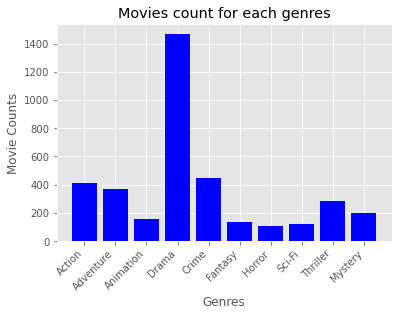

In [80]:
plt.bar(sep_genres, genre_counts, color='blue')
plt.xlabel("Genres")
plt.ylabel("Movie Counts")
plt.title("Movies count for each genres")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Text(0.5, 1.02, 'Top 10 movie director by movie counts')

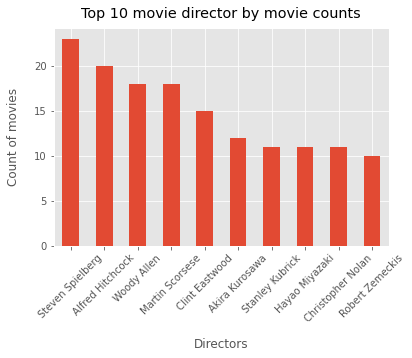

In [81]:
df['movie_director'].value_counts()[:10].plot(kind='bar', rot = 45)
plt.xlabel("Directors", labelpad=14)
plt.ylabel("Count of movies", labelpad=14)
plt.title("Top 10 movie director by movie counts", y=1.02)

Text(0.5, 1.02, 'Count of top movies throughout different years')

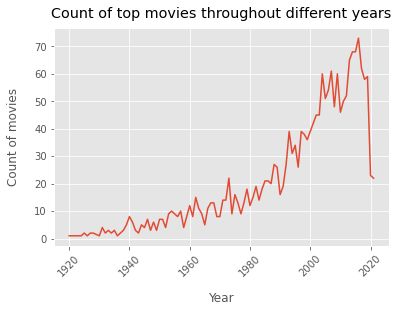

In [82]:
df.groupby(by='release_year').size().plot(kind = 'line', rot = 45)
plt.xlabel("Year", labelpad=14)
plt.ylabel("Count of movies", labelpad=14)
plt.title("Count of top movies throughout different years", y=1.02)

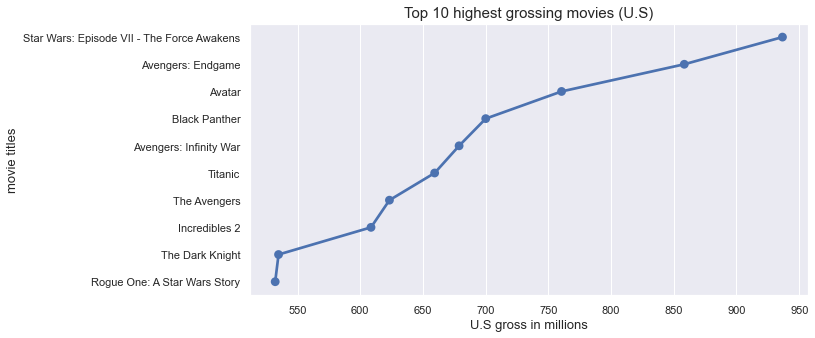

In [93]:
# Top grossing movies in U.S
info = pd.DataFrame(df['us_gross_millions'].sort_values(ascending = False))
info['movie_names'] = df['movie_names']
data = list(map(str,(info['movie_names'])))
x = list(data[:10])
y = list(info['us_gross_millions'][:10])


ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 highest grossing movies (U.S)",fontsize = 15)
ax.set_ylabel("movie titles",fontsize = 13)
ax.set_xlabel("U.S gross in millions",fontsize = 13)
sns.set_style("darkgrid")

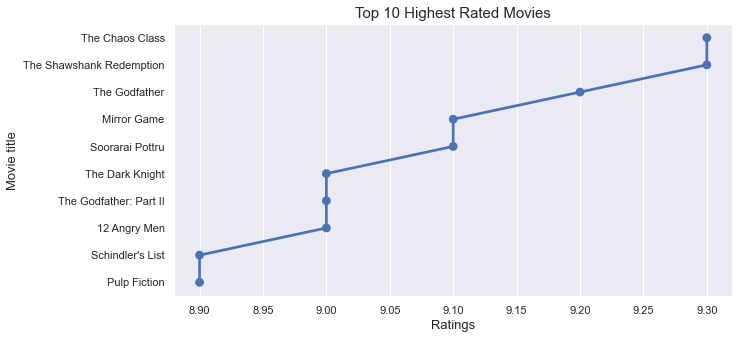

In [97]:
# Highest rated movies
info = pd.DataFrame(df['imdb_rating'].sort_values(ascending = False))
info['movie_names'] = df['movie_names']
data = list(map(str,(info['movie_names'])))

# extract top 10 movies
x = list(data[:10])
y = list(info['imdb_rating'][:10])

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Ratings",fontsize = 13)
ax.set_ylabel("Movie title",fontsize = 13)
sns.set_style("darkgrid")

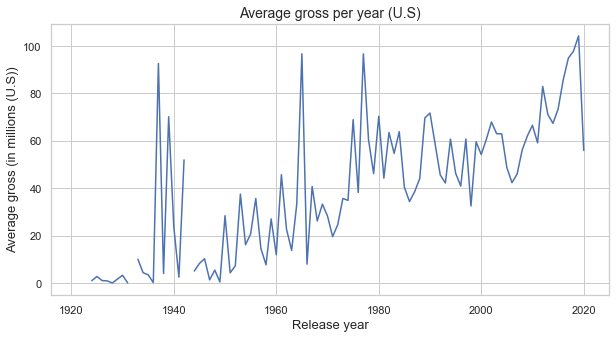

In [101]:
df.groupby('release_year')['us_gross_millions'].mean().plot()

#setup the title and labels of the figure.
plt.title("Average gross per year (U.S)",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average gross (in millions (U.S))',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

#### Limitation 
 - In this project we only extracted 17 genres which we specified into a list. 
 - We did not extracted all the information from the page such as budget for each movies, actors names, world wide gross etc. 
 - Web Scrapping lot of pages takes time and sending out so many requests to the server could result in an IP ban. 
 - The process of web scrapping to exract information is slow and takes time which can be improved. 

#### References:
- https://www.kaggle.com/akdagmelih/web-scraper-imdb-movies